## Подготовка данных

In [11]:
import pickle
with open("../results/dnn/ecoli_10_10000_1000.data", "rb") as file:
    data_list = pickle.load(file)
data = data_list[0]

In [12]:
print(data.train1.shape, data.train_ans.shape, data.test1.shape, data.test_ans.shape)

(10000, 10, 4) (10000, 4) (1000, 10, 4) (1000, 4)


## Самая простая модель - однослойная

In [7]:
from dnn_models import *
model = create_model_1()
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 4)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 164       
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.evaluate(test1, test_ans)

10000/10000 [==============================] - 6s 593us/step


[1.5557473237991333, 0.2349]

In [10]:
model.evaluate(test2, test_ans)

10000/10000 [==============================] - 2s 152us/step


[1.5407269609451293, 0.25190000000000001]

In [8]:
model, history = run_model_1(data, patience=5)

Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 7s 728us/step - loss: 1.4643 - acc: 0.2713 - val_loss: 1.4228 - val_acc: 0.2820
Epoch 2/100
9000/9000 [==============================] - 4s 399us/step - loss: 1.4014 - acc: 0.2842 - val_loss: 1.3849 - val_acc: 0.3010
Epoch 3/100
9000/9000 [==============================] - 4s 395us/step - loss: 1.3749 - acc: 0.3004 - val_loss: 1.3680 - val_acc: 0.3210
Epoch 4/100
9000/9000 [==============================] - 4s 393us/step - loss: 1.3640 - acc: 0.3098 - val_loss: 1.3591 - val_acc: 0.3320
Epoch 5/100
9000/9000 [==============================] - 3s 369us/step - loss: 1.3594 - acc: 0.3183 - val_loss: 1.3554 - val_acc: 0.3330
Epoch 6/100
9000/9000 [==============================] - 3s 383us/step - loss: 1.3576 - acc: 0.3186 - val_loss: 1.3542 - val_acc: 0.3310
Epoch 7/100
9000/9000 [==============================] - 4s 389us/step - loss: 1.3567 - acc: 0.3200 - val_loss: 1.3543 - val_acc: 

In [12]:
model.evaluate(test1, test_ans)

10000/10000 [==============================] - 1s 142us/step


[1.3627315309524537, 0.31569999999999998]

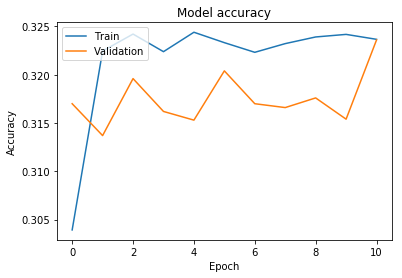

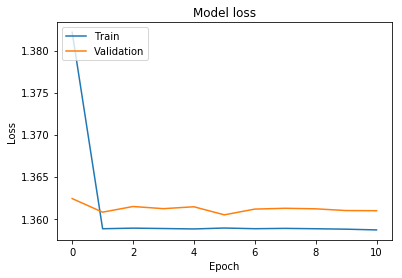

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

проверим, что не переучиваем

script dnn_model_1_run_all.py

In [128]:
with open("../results/dnn/dnn_model_1_all_runs_10_p2.pyob", "rb") as file:
    (test_accs_1, train_accs_1) = pickle.load(file)  
print(len(test_accs_1))

30


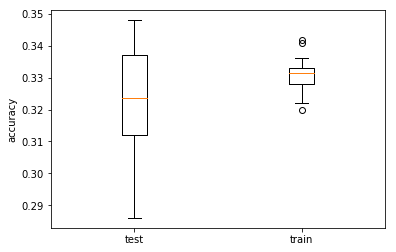

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([test_accs_1, train_accs_1])
plt.xticks([1,2], ('test', 'train'))
plt.ylabel("accuracy")
plt.show()

The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

In [130]:
import scipy.stats
# scipy.stats.wilcoxon(test_accs_1, train_accs_1)
scipy.stats.mannwhitneyu(test_accs_1, train_accs_1)

MannwhitneyuResult(statistic=329.0, pvalue=0.037371089869749831)

In [138]:
for patience in [1, 2, 3, 4, 5, 6, 7]:
    with open("../results/dnn/dnn_model_1_all_runs_10_p{}.pyob".format(patience), "rb") as file:
        (test_accs_1, train_accs_1) = pickle.load(file)  
        print(patience, scipy.stats.mannwhitneyu(test_accs_1, train_accs_1))

1 MannwhitneyuResult(statistic=337.5, pvalue=0.048852228492911383)
2 MannwhitneyuResult(statistic=329.0, pvalue=0.037371089869749831)
3 MannwhitneyuResult(statistic=254.5, pvalue=0.0019655138254915118)
4 MannwhitneyuResult(statistic=304.0, pvalue=0.015713954412081281)
5 MannwhitneyuResult(statistic=297.5, pvalue=0.012303608058560067)
6 MannwhitneyuResult(statistic=327.0, pvalue=0.035032144716299118)
7 MannwhitneyuResult(statistic=249.5, pvalue=0.0015523709484461079)


## Теперь сетка сложнее - два слоя

In [25]:
model = create_model_2()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 10, 4)             0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 40)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 44        
Total params: 454
Trainable params: 454
Non-trainable params: 0
_________________________________________________________________


In [26]:
model, history = run_model_2(data, 4)

In [29]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 0s 122us/step


[1.351066240310669, 0.33700000000000002]

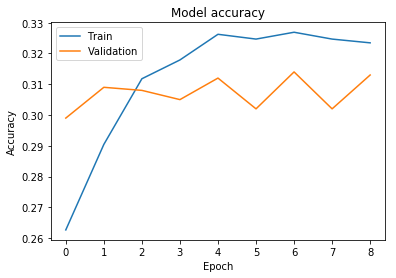

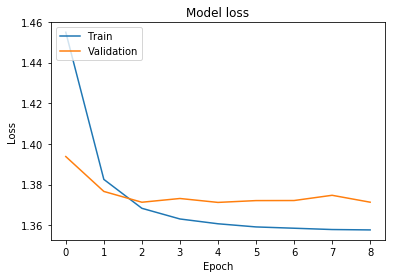

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Проверим, не переобучается ли

In [120]:
with open("../results/dnn/dnn_model_2_all_runs_10_p5.pyob", "rb") as file:
    (test_accs_2, train_accs_2) = pickle.load(file)  
print(len(test_accs_2))

30


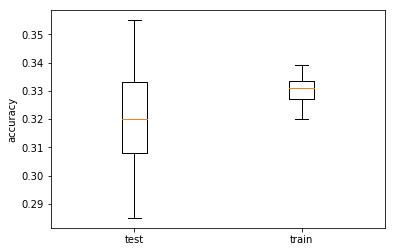

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([test_accs_2, train_accs_2])
plt.xticks([1,2], ('test', 'train'))
plt.ylabel("accuracy")
plt.show()

In [124]:
# scipy.stats.wilcoxon(test_accs_2, train_accs_2)
scipy.stats.mannwhitneyu(test_accs_2, train_accs_2)

MannwhitneyuResult(statistic=268.5, pvalue=0.0037197602285726945)

In [134]:
for patience in [1, 2, 3, 4, 5]:
    with open("../results/dnn/dnn_model_2_all_runs_10_p{}.pyob".format(patience), "rb") as file:
        (test_accs_2, train_accs_2) = pickle.load(file)  
        print(patience, scipy.stats.mannwhitneyu(test_accs_2, train_accs_2))

1 MannwhitneyuResult(statistic=280.0, pvalue=0.0060981564698755391)
2 MannwhitneyuResult(statistic=327.5, pvalue=0.035615600447949369)
3 MannwhitneyuResult(statistic=313.0, pvalue=0.0217757180282925)
4 MannwhitneyuResult(statistic=268.0, pvalue=0.003637682983065064)
5 MannwhitneyuResult(statistic=268.5, pvalue=0.0037197602285726945)


 # Сравнение моделей

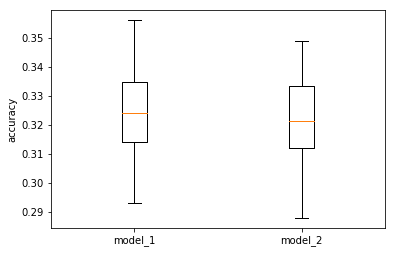

In [140]:
with open("../results/dnn/dnn_model_1_all_runs_10_p6.pyob", "rb") as file:
    (test_accs_1, train_accs_1) = pickle.load(file)  
    
with open("../results/dnn/dnn_model_2_all_runs_10_p3.pyob", "rb") as file:
    (test_accs_2, train_accs_2) = pickle.load(file) 
    
plt.boxplot([test_accs_1, test_accs_2])
plt.xticks([1, 2], ('model_1', 'model_2'))
plt.ylabel("accuracy")
plt.show()

In [141]:
print(scipy.stats.wilcoxon(test_accs_1, train_accs_2))
print(scipy.stats.mannwhitneyu(test_accs_1, train_accs_2))

WilcoxonResult(statistic=153.0, pvalue=0.10199257328585418)
MannwhitneyuResult(statistic=358.0, pvalue=0.088024730607560331)
